Hola Rafael!

Mi nombre es Matias y voy a estar revisando tu proyecto.

En la primer revision, de encontrar errores voy a estar marcandotelos para que puedas corregirlos por tu cuenta. Lo mas parecido a una situacion real de trabajo como DA. De haber posteriores revisiones

Encontraras mis comentarios debajo - **por favor no los muevas, modifiques o elimines**.

Encontraras mis comentarios en verde, amarillo o rojo de esta manera:

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Cuidado, se recomienda...
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Necesita correcion. El trabajo no puede ser aceptado si precisa correcion.
</div>

Puedes responder a mis comentarios utilizando un mensaje de este tipo:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

## Introduccion

**Descripción del proyecto**

Trabajas para la compañía minera OilyGiant. Tu tarea es encontrar el mejor lugar para un nuevo pozo.
Pasos para elegir la ubicación:  

* Recolecta los parámetros del pozo de petróleo en la región seleccionada: calidad del petróleo y volumen de reservas;
* Construye un modelo para predecir el volumen de reservas en los nuevos pozos;
* Selecciona los pozos de petróleo con los valores estimados más altos;
* Elige la región con el mayor beneficio total para los pozos de petróleo seleccionados.

Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

**Instrucciones del proyecto**

Descarga y prepara los datos. Explica el procedimiento.
Entrena y prueba el modelo para cada región:

* 2.1 Divide los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25.
* 2.2 Entrena el modelo y haz predicciones para el conjunto de validación.
* 2.3 Guarda las predicciones y las respuestas correctas para el conjunto de validación.
* 2.4 Muestra en la pantalla el volumen promedio de las reservas previstas y la RECM del modelo.
* 2.5 Analiza los resultados.

**Prepárate para el cálculo de ganancias:**

* 3.1. Almacena todos los valores clave para los cálculos en variables separadas.
* 3.2. Calcula el volumen de reservas suficiente para desarrollar un nuevo pozo sin pérdidas. Compara el valor obtenido con el volumen medio de reservas de cada región.
* 3.3. Proporciona los hallazgos sobre la preparación para el paso de cálculo de ganancias.

**Escribe una función para calcular la ganancia de un conjunto de pozos de petróleo seleccionados y modela las predicciones:**
* 4.1. Escoge los pozos con los valores más altos de predicciones.
* 4.2. Resume el volumen objetivo de reservas de acuerdo con estas predicciones
* 4.3. Proporciona los hallazgos: sugiere una región para el desarrollo de pozos petroleros y justifica la elección. Calcula el beneficio por el volumen de reservas obtenido.

**Calcula riesgos y ganancias para cada región:**
* 5.1. Usa la técnica bootstrapping con 1000 muestras para encontrar la distribución del beneficio.
* 5.2. Encuentra el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. La pérdida es una ganancia negativa, calcúlala como una probabilidad y luego exprésala como un porcentaje.
* 5.3. Proporciona los hallazgos: sugiere una región para el desarrollo de pozos petroleros y justifica la elección.

**Condiciones:**

* Solo la regresión lineal es adecuada para el entrenamiento de modelos (el resto no son lo suficientemente predecibles).
* Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
* El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
* Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
* Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.
* Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

**Descripción de datos**

Los datos de exploración geológica de las tres regiones se almacenan en archivos:  
* geo_data_0.csv. Descarga el conjunto de datos
* geo_data_1.csv. Descarga el conjunto de datos
* geo_data_2.csv. Descarga el conjunto de datos
* **id** — identificador único de pozo de petróleo
* **f0, f1, f2** — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
* **product** — volumen de reservas en el pozo de petróleo (miles de barriles).



**PD la ultima parte no me quedo muy clara de las actividades a desarrollar, cualquier sugerencia o modificacion estamos en la mejor disposicion de realizarla, saludos**

## Exploracion de datos

### Librerias a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve

### Carga de datos

In [2]:
# Cargamos los datos de las tres areas
df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
def displaydata(data):
    print('Informacion de los datos y tu tipo')
    data.info()
    print()
    print('Muestra de datos')
    display(data.head(10))
    print()
    print('Valores ausentes')
    print(data.isna().sum())
    print()
    print('Descripcion de los datos')
    print(data.describe())
    print()
    print('Valores duplicados')
    print(data.duplicated().sum())


In [4]:
displaydata(df1)

Informacion de los datos y tu tipo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Muestra de datos


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945



Valores ausentes
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Descripcion de los datos
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347

Valores duplicados
0


In [5]:
displaydata(df2)

Informacion de los datos y tu tipo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Muestra de datos


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408



Valores ausentes
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Descripcion de los datos
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.734063       5.019721     137.945408

Valores duplicados
0


In [6]:
displaydata(df3)

Informacion de los datos y tu tipo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Muestra de datos


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532



Valores ausentes
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Descripcion de los datos
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.844801      16.739402     190.029838

Valores duplicados
0


No contamos con valores ausentes, ni con valores duplicados

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen comienzo.
</div>

## Preparacion de datos

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
    
Corregido, se movieron al inicio
</div>

Procederemos a separar los datos y a eliminar la columna id en cada conjunto ya que no nos aporta algun dato relevante

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Sugiero que las celdas donde importas librerias siempre esten al principio del proyecto
    
Esta deberia estar luego de la que usas para importar pandas, numpy y plt
</div>

### Separacion de datos

In [7]:
# Funcion para eliminar columnas
def drop_col(data,column_delete):
    data = data.drop(column_delete, axis = 1)
    return data

In [8]:
# Separamos los datos en entrenamiento y validación
df1_train, df1_valid = train_test_split(df1, test_size = 0.25, random_state =92)
df2_train, df2_valid = train_test_split(df2, test_size = 0.25, random_state =92)
df3_train, df3_valid = train_test_split(df3, test_size = 0.25, random_state =92)

In [9]:
# Verificamos el tamaño de las muestras
df1_train.shape, df1_valid.shape,df2_train.shape, df2_valid.shape,df3_train.shape, df3_valid.shape

((75000, 5), (25000, 5), (75000, 5), (25000, 5), (75000, 5), (25000, 5))

In [10]:
# Designamos los features
column_delete = ['product','id']
df1_train_features = drop_col(df1_train,column_delete)
df2_train_features = drop_col(df2_train,column_delete)
df3_train_features = drop_col(df3_train,column_delete)
df1_valid_features = drop_col(df1_valid,column_delete)
df2_valid_features = drop_col(df2_valid,column_delete)
df3_valid_features = drop_col(df3_valid,column_delete)

In [11]:
# Verificamos tamños de las muestras
df3_train_features.shape, df3_valid_features.shape

((75000, 3), (25000, 3))

In [12]:
#Desiganmos el target
df1_train_target = df1_train['product']
df2_train_target = df2_train['product']
df3_train_target = df3_train['product']
df1_valid_target = df1_valid['product']
df2_valid_target = df2_valid['product']
df3_valid_target = df3_valid['product']

In [13]:
# Verificamos el tamaño de las muestras
df1_train_target.shape, df1_valid_target.shape

((75000,), (25000,))

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo preparando los subconjuntos para los 3 datasets
</div>

Hemos verificado nuestros conjuntos y pasaremos a estandarizar los datos

In [14]:
df1_train_features

,f0,f1,f2
90040,0.526702,-0.422513,-3.537051
41996,0.857391,0.640599,6.368011
78969,-0.981208,-0.002372,6.352899
73756,-1.047012,-0.100438,0.394056
74629,-0.183744,0.810445,-0.401329
...,...,...,...
64395,0.250918,-0.183962,3.646616
6162,0.828667,0.479602,4.113058
31555,0.969644,-0.510774,0.351081
94250,0.473560,-0.251014,3.196882


In [15]:
# Creamos una funcion para hacer el escalado de datos
def scaler_tr(data):
    sc = StandardScaler() # Creamos nuestro scaler
    sc.fit(data) # Ajustamos los datos
    df = sc.transform(data)
    return df

In [16]:
# Trasnformamos los datos
df1_train_scale = scaler_tr(df1_train_features)
df2_train_scale = scaler_tr(df2_train_features)
df3_train_scale = scaler_tr(df3_train_features)
df1_valid_scale = scaler_tr(df1_valid_features)
df2_valid_scale = scaler_tr(df2_valid_features)
df3_valid_scale = scaler_tr(df3_valid_features)

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
    
Corregido, se realizo el fit y el transform para cada conjunto, tiene razon por el data leakage de cada conjunto.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Requiere Correccion
    
Fiteas el Std Scaler con el df1 y luego usas ese scaler para los otros dos df, ahi esta el tema
    
Deberias fitear y transformar el df1, luego instanciar y fitear un 2do scaler para transformar el df2 y por ultimo instanciar y fitear un 3er sclaer para transformar el df3
</div>

In [17]:
# Hacemos dataframe para tener los indices y poder relacionar el id del pozo
column_names = ['f0','f1','f2'] # Nombramos las columnas
def index(data, scale):
    df = pd.DataFrame(scale, columns=column_names, index =data.index)
    return df

In [18]:
# Creamos los dataframes
df1_train_features = index(df1_train_features, df1_train_scale)
df2_train_features = index(df2_train_features, df2_train_scale)
df3_train_features = index(df3_train_features, df3_train_scale)
df1_valid_features = index(df1_valid_features, df1_valid_scale)
df2_valid_features = index(df2_valid_features, df2_valid_scale)
df3_valid_features = index(df3_valid_features, df3_valid_scale)

### Entrenamiento de modelo

In [19]:
# Creamos una funcion para la prediccion
def linear_model(features,target,valid):
    model = LinearRegression() # creamos el modelo
    model.fit(features, target) # Entrenamos el modelo
    p = model.predict(valid)
    return p

### Predicciones

In [20]:
# Predecimos los resultados
df1_predict = linear_model(df1_train_features,df1_train_target,df1_valid_features)
df2_predict = linear_model(df2_train_features,df2_train_target,df2_valid_features)
df3_predict = linear_model(df3_train_features,df3_train_target,df3_valid_features)

In [21]:
# Sacamos los valores promedio de las predicciones
df1_predict_mean = df1_predict.mean()
df2_predict_mean = df2_predict.mean()
df3_predict_mean = df3_predict.mean()

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
    
Corregido, el entrenamiento y prediccion con cada area/conjunto de datos
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Aqui tenemos el mismo tema a corregir.
    
El modelo que entrenas con datos de DF1 sirve para predecir sobre datos de DF1, pero lo estas usando tambien para predecir datos de validacion de los otros 3 DFs
    
En contexto, tienes 3 regiones o yaciemientos de hidrocarburo, y estas tratando de predecir el comportamiento de los 3 con un modelo entrenado con datos de 1
    
Tienes que entrenar un modelo por cada yacimiento y usar cada modelo para predecir en dicho yacimiento
</div>

### Volumen promedio y RECM

In [22]:
print('Volumen promedio area 1:',df1_predict_mean)
print('Volumen promedio area 2:',df2_predict_mean)
print('Volumen promedio area 3:',df3_predict_mean)

Volumen promedio area 1: 92.53691224680499
Volumen promedio area 2: 68.81811839475613
Volumen promedio area 3: 94.92440833741698


#### Prueba de cordura

In [23]:
def recm_cord(data):
    recm = mean_squared_error(data,pd.Series(data.mean(), index=data),squared=False)
    return recm

In [24]:
print('Las predicciones del area 1 erraron por:', recm_cord(df1_valid_target),'millones de barriles')
print('Las predicciones del area 2 erraron por:', recm_cord(df2_valid_target),'millones de barriles')
print('Las predicciones del area 3 erraron por:', recm_cord(df3_valid_target),'millones de barriles')

Las predicciones del area 1 erraron por: 44.47186981080427 millones de barriles
Las predicciones del area 2 erraron por: 46.095375848130274 millones de barriles
Las predicciones del area 3 erraron por: 44.6782206821131 millones de barriles


In [25]:
recm_cordura = {
    'areas' : ['df1','df2','df3'],
    'recm' : [recm_cord(df1_valid_target), recm_cord(df2_valid_target),recm_cord(df3_valid_target)]
}

In [26]:
recm_cordura = pd.DataFrame(recm_cordura)

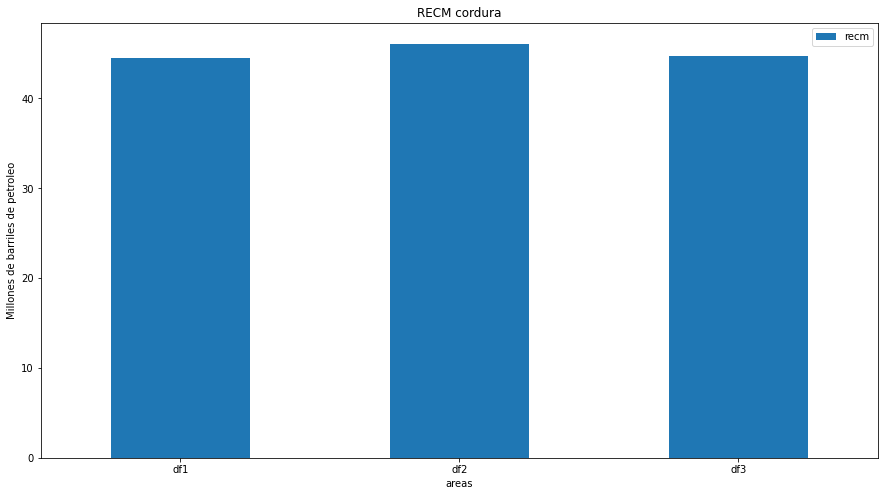

In [27]:
recm_cordura.plot(
    x='areas',
    kind='bar',
    figsize=(15,8),
    rot=0,
title='RECM cordura')
plt.ylabel('Millones de barriles de petroleo')
plt.show()



In [28]:
# Calculamos el RECM para las predicciones
df1_recm = mean_squared_error(df1_valid_target, df1_predict, squared=False)
df2_recm = mean_squared_error(df2_valid_target, df2_predict, squared=False)
df3_recm = mean_squared_error(df3_valid_target, df3_predict, squared=False)

In [29]:
print('Las predicciones del area 1 erraron por:',df1_recm,'millones de barriles')
print('Las predicciones del area 2 erraron por:',df2_recm,'millones de barriles')
print('Las predicciones del area 3 erraron por:',df3_recm,'millones de barriles')

Las predicciones del area 1 erraron por: 37.79741735018461 millones de barriles
Las predicciones del area 2 erraron por: 0.9140183216371996 millones de barriles
Las predicciones del area 3 erraron por: 39.948144317814496 millones de barriles


In [30]:
recm_final = {
    'areas' : ['df1','df2','df3'],
    'recm' : [df1_recm,df2_recm,df3_recm]
}

In [31]:
recm_final = pd.DataFrame(recm_final)

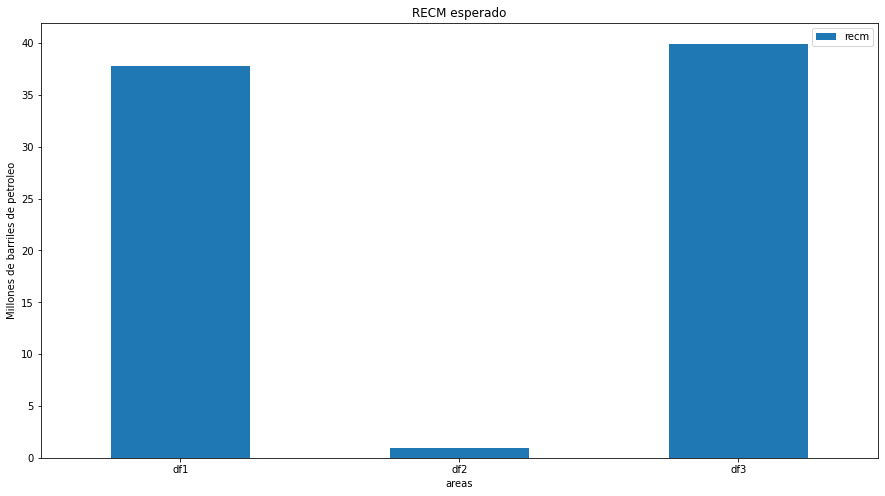

In [32]:
recm_final.plot(
    x='areas',
    kind='bar',
    figsize=(15,8),
    rot=0,
title='RECM esperado')
plt.ylabel('Millones de barriles de petroleo')
plt.show()



### RECM conclusiones

Despues de realizar una prueba de cordura podemos observar que tenemos un error similar para las tres areas entre 44-46 millones de barriles,sin embargo, al momento de realizar las prediccion vemos que el error de prediccion es muy bajo de 0.94 para el area 2, mientras que el area 1 y 3 tienden a estar entre 37-39 millones de barriles de error, por lo que eligiriamos el area 2 para realizar nuestra inversión.

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
    
Reformulada la conclusión
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo aqui
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Solo recuerda volver a correr esta seccion y evaluar los resultados una vez que hayas corregido las secciones previas
</div>

## Requisitos de ganancia

In [33]:
# Pozos
pozos = 200

# Costo de realizar 200 pozos
cost = 100000000

# Precio del barril
price = 4500

In [34]:
# Calcularemos si es rentable en caso de que hicieramos la exploracion de los 200 pozos y esos pozos entregaran la media de la
# exploracion del área
def rentabilidad_media(area_predict_mean):
    rent = (area_predict_mean * pozos * price) - cost # Del costo de 200 pozos, restamos el valor de 200 pozos entregando la media de prediccion 
    return rent 

In [35]:
print('La rentabilidad conservadora del area 1 es de:', round(rentabilidad_media(df1_predict_mean),2),'USD')
print('La rentabilidad conservadora del area 2 es de:', round(rentabilidad_media(df2_predict_mean),2),'USD')
print('La rentabilidad conservadora del area 3 es de:', round(rentabilidad_media(df3_predict_mean),2),'USD')

La rentabilidad conservadora del area 1 es de: -16716778.98 USD
La rentabilidad conservadora del area 2 es de: -38063693.44 USD
La rentabilidad conservadora del area 3 es de: -14568032.5 USD


In [36]:
rentabilidad_conservadora = pd.DataFrame({
    'rent':[rentabilidad_media(df1_predict_mean),rentabilidad_media(df2_predict_mean),rentabilidad_media(df3_predict_mean)],
    'areas' : ['df1','df2','df3']})

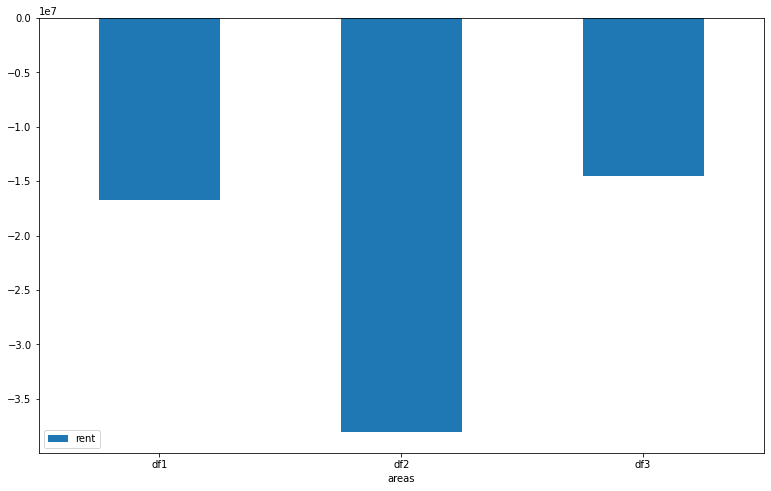

In [37]:
rentabilidad_conservadora.plot(
    x='areas',
    kind='bar',
    rot = 0,
    figsize=(13,8))
plt.show()

Viendo la rentabilidad de forma conservadora, suponiendo que los volumenes de los pozos es de la media de las predicciones, dandonos como resultado que ningun area llega a ser rentable, pero esto es solo un resultado preliminar en caso de que todos los pozos nos entreguen la misma cantidad de barriles, veamos como se comporta en caso que elijamos los mejores pozos de cada zona

## Preparacion y calculo de ganancias

In [38]:
# Creamos dataframes con el valor de las predicciones y el valor medio de las predicciones
df1_gain = { 
    'predict' : df1_predict,
    'predict_mean' : df1_predict_mean}

df2_gain = { 
    'predict' : df2_predict,
    'predict_mean' : df2_predict_mean}

df3_gain = { 
    'predict' : df3_predict,
    'predict_mean' : df3_predict_mean}

df1_gain = pd.DataFrame(df1_gain, index=df1_valid_features.index) 
df2_gain = pd.DataFrame(df2_gain, index=df2_valid_features.index)
df3_gain = pd.DataFrame(df3_gain, index=df3_valid_features.index)

In [39]:
# Realizamos la diferencia entre la prediccion y el valor medio de las predicciones
df1_gain['dif'] = df1_gain['predict'] - df1_gain['predict_mean']
df2_gain['dif'] = df2_gain['predict'] - df2_gain['predict_mean']
df3_gain['dif'] = df3_gain['predict'] - df3_gain['predict_mean']

In [40]:
# añadimos el id del pozo a las predicciones para saber a cual nos referimos
def id_merge(data,data_org):
    df = pd.merge(data, data_org['id'],how='left', left_index=True, right_index=True)
    return df

In [41]:
df1_gain = id_merge(df1_gain, df1)
df2_gain = id_merge(df2_gain, df1)
df3_gain = id_merge(df3_gain, df1)

In [42]:
df1_gain

,predict,predict_mean,dif,id
97435,110.909731,92.536912,18.372819,Un6cT
31136,87.281698,92.536912,-5.255214,VIjxx
9678,89.886850,92.536912,-2.650062,r4glM
78550,76.436237,92.536912,-16.100676,mFE29
4131,127.023393,92.536912,34.486480,14rai
...,...,...,...,...
45911,78.537159,92.536912,-13.999754,TUyWw
38756,70.645225,92.536912,-21.891687,ryiem
12914,103.555033,92.536912,11.018121,sByIP
31825,108.753798,92.536912,16.216886,OFQzR


In [43]:
# Creamos una funcion para obtener los valores de solo aquellos pozos que estan por encima de la media.
def total_vol(data):
    vol = 0
    for x in data['dif']:
        if x > 0:
            vol += x
    return vol

In [44]:
vol_df1 = total_vol(df1_gain)
vol_df2 = total_vol(df2_gain)
vol_df3 = total_vol(df3_gain)

In [45]:
print('Para el area 1 los millones de barriles a considerar son:', vol_df1)
print('Para el area 2 los millones de barriles a considerar son:', vol_df2)
print('Para el area 3 los millones de barriles a considerar son:', vol_df3)

Para el area 1 los millones de barriles a considerar son: 232689.56274775762
Para el area 2 los millones de barriles a considerar son: 503372.1820874252
Para el area 3 los millones de barriles a considerar son: 199391.61206728904


Estos barriles son de puntos donde la prediccion es mayor a la media, por lo que seleccionaremos de cada area los pozos con una prediccion mayor a la media.

In [46]:
# Guardamos los valores de los pozos de los cuales la diferencia es mayor a cero
df1_prospects = df1_gain[df1_gain['dif'] > 0]
df2_prospects = df2_gain[df2_gain['dif'] > 0]
df3_prospects = df3_gain[df3_gain['dif'] > 0]

In [47]:
# Verificamos los tamaños de los conjuntos
df1_prospects.shape,df2_prospects.shape,df3_prospects.shape 

((12475, 4), (12390, 4), (12470, 4))

Podemos observar que aproximadamente el 50% de cada area y de pozos tiene reservas mayores a la media del area, y estos pozos son los que utilizaremos para realizar los calculos 

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
    
Corregido, lo requerido en este punto se elaboro en el punto 4 de este proyecto
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

En esta seccion en realidad el objetivo es segun el **precio del barril** y el **costo de producir un pozo** calcular cual es la cantidad de barriles minima que debe producir un pozo para producir ganancia
    
Y en funcion de eso, entender si la media de cada region esta produciendo mas o menos barriles de ese "piso" necesario para generar ganacias
</div>

Seleccionamos los 200 pozos con los valores mas altos de prediccion

In [48]:
df1_final = df1_prospects.sort_values('predict', ascending=False).head(200)
df2_final = df2_prospects.sort_values('predict', ascending=False).head(200)
df3_final = df3_prospects.sort_values('predict', ascending=False).head(200)

In [49]:
# Calculamos el volumnen predicho de los 200 pozos con valos mas alto
df1_final_vol = df1_final['predict'].sum()
df2_final_vol = df2_final['predict'].sum()
df3_final_vol = df3_final['predict'].sum()

In [50]:
print('El volumen de reservas para los mejores 200 pozos en el area 1 es:', df1_final_vol)
print('El volumen de reservas para los mejores 200 pozos en el area 2 es:', df2_final_vol)
print('El volumen de reservas para los mejores 200 pozos en el area 3 es:', df3_final_vol)

El volumen de reservas para los mejores 200 pozos en el area 1 es: 30988.091606709153
El volumen de reservas para los mejores 200 pozos en el area 2 es: 27683.94152552249
El volumen de reservas para los mejores 200 pozos en el area 3 es: 29654.287031819586


In [51]:
# funcion para calcular el costo
def ganancia(data):
    gan = data['predict'].sum() * 4500 - cost
    return round(gan,2)

In [52]:
print('Las ganancias del area 1 son:',ganancia(df1_final))
print('Las ganancias del area 2 son:',ganancia(df2_final))
print('Las ganancias del area 3 son:',ganancia(df3_final))

Las ganancias del area 1 son: 39446412.23
Las ganancias del area 2 son: 24577736.86
Las ganancias del area 3 son: 33444291.64


De acuerdo a las ganancias finales posibles a obtener tenemos que el area 1 y 3 es la de mayor ganancia con 39 y 33 millones USD respectivamente, mientas que el area con menor ganancia es la 2 con 24 millones USD, sin embargo, de acuerdo a nuestros modelos y sus predicciones tenemos que el area 2 presenta el menor indice de error de 0.94 millones de barriles mientras que las areas 1 y 3 cuentan con un error de hasta 37 y 39 millones de barriles.

Por lo tanto el area a elegir para realizar la inversion seria el area 2 que aunque tendria menores ganancias que las demas areas, tiene el menor indice de error, por lo que las ganancias serian mas seguras, que irse por las areas de mas ganancias pero mas incertidumbre a que falle.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo en esta seccion
</div>

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
    
Corregido, se replantearon las conclusiones
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Recuerda que cuando hagas los cambios necesarios en las primeras secciones y vuelvas a correr las secciones posterios, es probable que estas conclusiones cambien *(porque los valores predecidos deberian modificarse cuando uses un modelo para cada yacimiento)*
</div>

## Calcula riesgos y ganancias para cada región

In [53]:
# Elaboramos la funcion area 1
def revenue(target, count=200):
    probs_sorted = target.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return 4500 * selected.sum() - cost

state = np.random.RandomState(12345)

values = []   
for i in range(1000):
    target_subsample = df1_prospects['predict'].sample(n=500, replace=True, random_state=state)
    values.append(revenue(target_subsample))
    
values = pd.Series(values)
lower = values.quantile(0.01) 

mean = values.mean()
print("Ingresos promedio:", mean)
print("Cuantil del 1 %:", lower)

Ingresos promedio: 13053727.515932247
Cuantil del 1 %: 10847920.531213574


In [54]:
# Elaboramos la funcion area 2
values = []   
for i in range(1000):
    target_subsample = df2_prospects['predict'].sample(n=500, replace=True, random_state=state)
    values.append(revenue(target_subsample))
    
values = pd.Series(values)
lower = values.quantile(0.01) 

mean = values.mean()
print("Ingresos promedio:", mean)
print("Cuantil del 1 %:", lower)

Ingresos promedio: 19856373.453267217
Cuantil del 1 %: 17113596.8452593


In [55]:
# Elaboramos la funcion area 3

values = []   
for i in range(1000):
    target_subsample = df3_prospects['predict'].sample(n=500, replace=True, random_state=state)
    values.append(revenue(target_subsample))
    
values = pd.Series(values)
lower = values.quantile(0.01) 

mean = values.mean()
print("Ingresos promedio:", mean)
print("Cuantil del 1 %:", lower)

Ingresos promedio: 10963758.92179554
Cuantil del 1 %: 9134533.408777054


De acuerdo a las cifras obtenidas, podemos concluir que la mejor zona para invertir es la 2, con unas ganancias de almenos 19 millones USD, derivando de las conclusiones, recordemos que de igual forma es el area que menor error tiene de prediccion, por lo que seria el area ideona para realizar la inversion.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo en esta seccion
</div>

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
    
Corregido, se replantearon las conclusiones
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Recuerda que cuando hagas los cambios necesarios en las primeras secciones y vuelvas a correr las secciones posterios, es probable que estas conclusiones cambien *(porque los valores predecidos deberian modificarse cuando uses un modelo para cada yacimiento)*
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor - 2da ITERACION</b> <a class="tocSkip"></a>

Bien hecho Rafael, tu proyecto esta aprobado felicitaciones
</div>